In [1]:
library(caret)
library(rpart)
library(dplyr)
library(ROSE)
library(randomForest)
library(rpart.plot)
library(xgboost)


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loaded ROSE 0.0-4


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [2]:
credit_card=read.csv(file='creditcard.csv')

In [3]:
View(credit_card)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-1.3598071,-0.07278117,2.53634674,1.37815522,-0.338320770,0.46238778,0.239598554,0.098697901,0.3637870,⋯,-0.018306778,0.277837576,-0.110473910,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
0,1.1918571,0.26615071,0.16648011,0.44815408,0.060017649,-0.08236081,-0.078802983,0.085101655,-0.2554251,⋯,-0.225775248,-0.638671953,0.101288021,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
1,-1.3583541,-1.34016307,1.77320934,0.37977959,-0.503198133,1.80049938,0.791460956,0.247675787,-1.5146543,⋯,0.247998153,0.771679402,0.909412262,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
1,-0.9662717,-0.18522601,1.79299334,-0.86329128,-0.010308880,1.24720317,0.237608940,0.377435875,-1.3870241,⋯,-0.108300452,0.005273597,-0.190320519,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
2,-1.1582331,0.87773675,1.54871785,0.40303393,-0.407193377,0.09592146,0.592940745,-0.270532677,0.8177393,⋯,-0.009430697,0.798278495,-0.137458080,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,69.99,0
2,-0.4259659,0.96052304,1.14110934,-0.16825208,0.420986881,-0.02972755,0.476200949,0.260314333,-0.5686714,⋯,-0.208253515,-0.559824796,-0.026397668,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
4,1.2296576,0.14100351,0.04537077,1.20261274,0.191880989,0.27270812,-0.005159003,0.081212940,0.4649600,⋯,-0.167716266,-0.270709726,-0.154103787,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
7,-0.6442694,1.41796355,1.07438038,-0.49219902,0.948934095,0.42811846,1.120631358,-3.807864239,0.6153747,⋯,1.943465340,-1.015454710,0.057503530,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
7,-0.8942861,0.28615720,-0.11319221,-0.27152613,2.669598660,3.72181806,0.370145128,0.851084443,-0.3920476,⋯,-0.073425100,-0.268091632,-0.204232670,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0


In [4]:
names(credit_card)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [5]:
str(credit_card)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [6]:
head(credit_card)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [7]:
# The feature 'Class' is a variable which indicates 1 as fraud transaction and 0 as non-fraud transaction.
credit_card$Class=as.factor(credit_card$Class)

In [8]:
summary(credit_card$Class)

0      1 
284315    492

In [9]:
sum(is.na(credit_card))

[1] 0

In [10]:
credit_card.true=credit_card[credit_card$Class == 0,]
credit_card.false=credit_card[credit_card$Class == 1,]


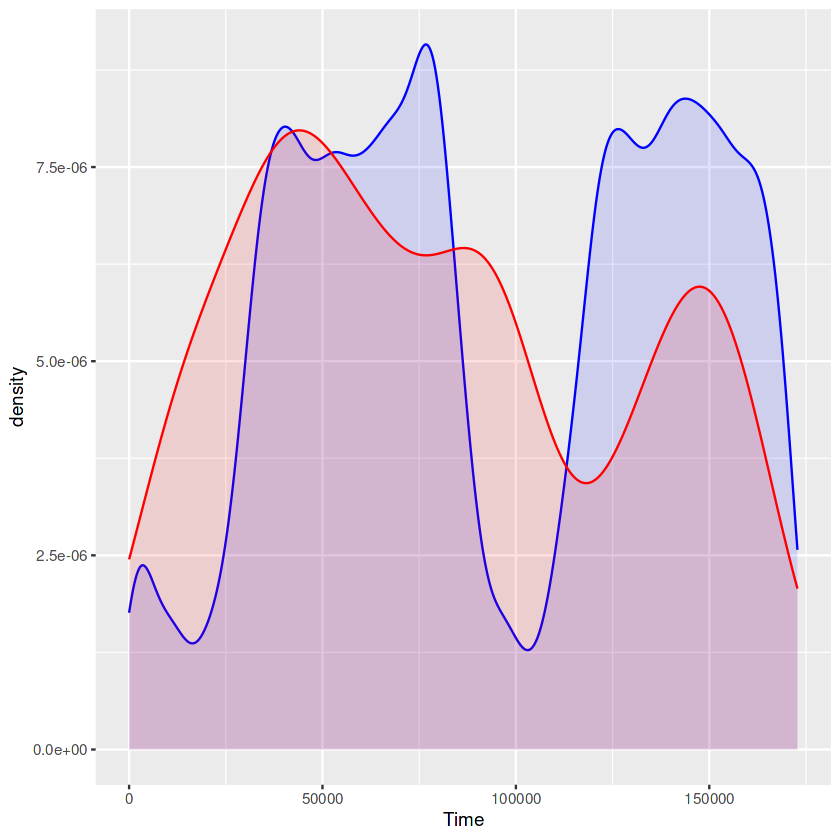

In [11]:
# Plotting the density plots for the above separated datasets 
ggplot()+geom_density(data=credit_card.true,aes(x=Time),color="blue",
                      fill="blue",alpha=0.12)+geom_density(data=credit_card.false,aes(x=Time),color='red',fill="red",alpha=0.12)


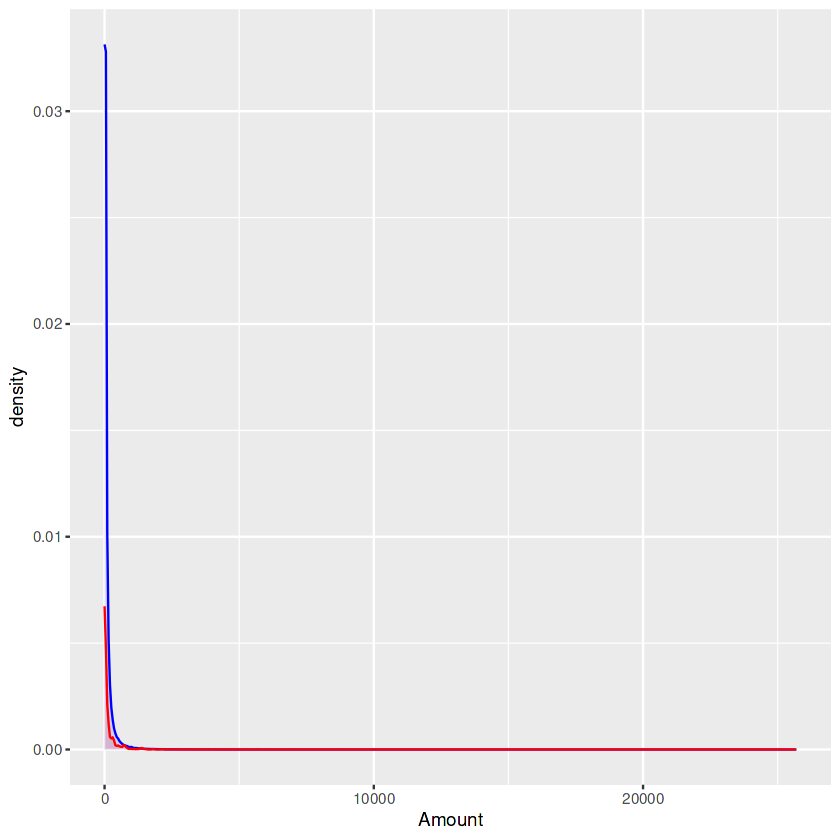

In [12]:
ggplot()+geom_density(data=credit_card.true,aes(x=Amount),color="blue",
                     fill="blue",alpha=0.12)+geom_density(data=credit_card.false,aes(x=Amount),color="red",fill="red",alpha=0.12)

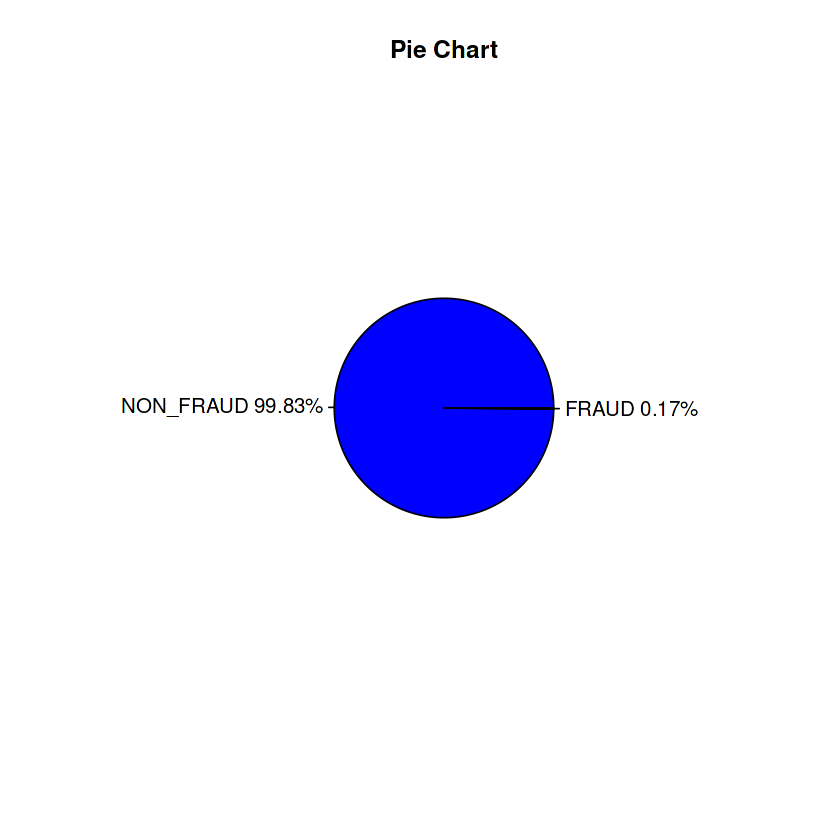

In [13]:
# Now we will plot a piechart to compare the number of frauds to non-frauds
# We do this to get a proper visualization of the number of fraud transactions and non-fraud transactions 
labels= c("NON_FRAUD","FRAUD")
labels=paste(labels,round(prop.table(table(credit_card$Class))*100,2))
labels=paste0(labels,"%")
pie(table(credit_card$Class),labels,col=c("blue","red"), main="Pie Chart")

In [19]:
# From the above pie chart we get to know that out of the 100% transactions made : 
# 99.83% of the transactions are Geneuine(Non-Fraud) transactions.
# 0.17% of the transactions made were Fraud transactions.


In [14]:
# Now we will split the rows and columns
rows=nrow(credit_card)
cols=ncol(credit_card)


In [15]:
set.seed(39)
credit_card=credit_card[sample(rows),1:cols]
ntr= as.integer(round(0.8*rows))



### Here, we split the given dataset into Training and Testing Datatset. (80% Training and 20% Testing)

In [19]:
credit_card.train=credit_card[1:ntr,1:cols]
credit_card.test=credit_card[(ntr+1):rows,-cols]
credit_card.testc=credit_card[(ntr+1):rows,cols]


In [20]:
credit_card.testc=as.data.frame(credit_card.testc)
colnames(credit_card.testc)[1]=c("Class")

# Logistic Regression

In [21]:
glm_fit <- glm(Class ~ ., data=credit_card.train,family='binomial')
pred_glm<- predict(glm_fit,credit_card.test,type='response')

credit_card.testc$Pred=0L
credit_card.testc$Pred[pred_glm>0.5]=1L
credit_card.testc$Pred=factor(credit_card.testc$Pred)

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56846    38
         1     9    68
                                          
               Accuracy : 0.9992          
                 95% CI : (0.9989, 0.9994)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : 9.484e-11       
                                          
                  Kappa : 0.7428          
                                          
 Mcnemar's Test P-Value : 4.423e-05       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.6415          
         Pos Pred Value : 0.9993          
         Neg Pred Value : 0.8831          
             Prevalence : 0.9981          
         Detection Rate : 0.9980          
   Detection Prevalence : 0.9986          
      Balanced Accuracy : 0.8207          
                                          
       'Positive' Class : 0               
                  

## The Logistic Regression Model gives us an accuracy of 99.92% 

Area under the curve (AUC): 0.821

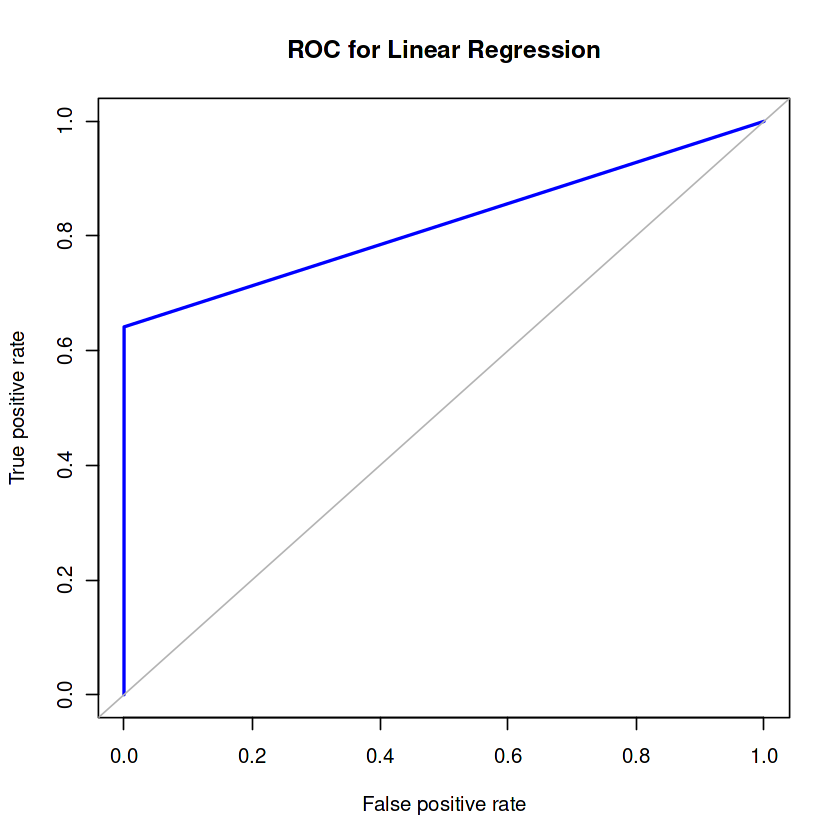

In [22]:
roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit= TRUE,
         col="blue",main="ROC for Linear Regression")

### This is the ROC of Logistic Regression 

Area Under curve (AUC) is 0.821

# Decision Tree

In [23]:
tree=rpart(Class ~.,data=credit_card.train,method="class")
pred_tree=predict(tree,credit_card.test)

credit_card.testc$Pred=0L
credit_card.testc$Pred[pred_glm>0.5]=1L
credit_card.testc$Pred=factor(credit_card.testc$Pred)

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56846    38
         1     9    68
                                          
               Accuracy : 0.9992          
                 95% CI : (0.9989, 0.9994)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : 9.484e-11       
                                          
                  Kappa : 0.7428          
                                          
 Mcnemar's Test P-Value : 4.423e-05       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.6415          
         Pos Pred Value : 0.9993          
         Neg Pred Value : 0.8831          
             Prevalence : 0.9981          
         Detection Rate : 0.9980          
   Detection Prevalence : 0.9986          
      Balanced Accuracy : 0.8207          
                                          
       'Positive' Class : 0               
                  

### The Decision Tree Algorithm gives an accuracy of 99.92%

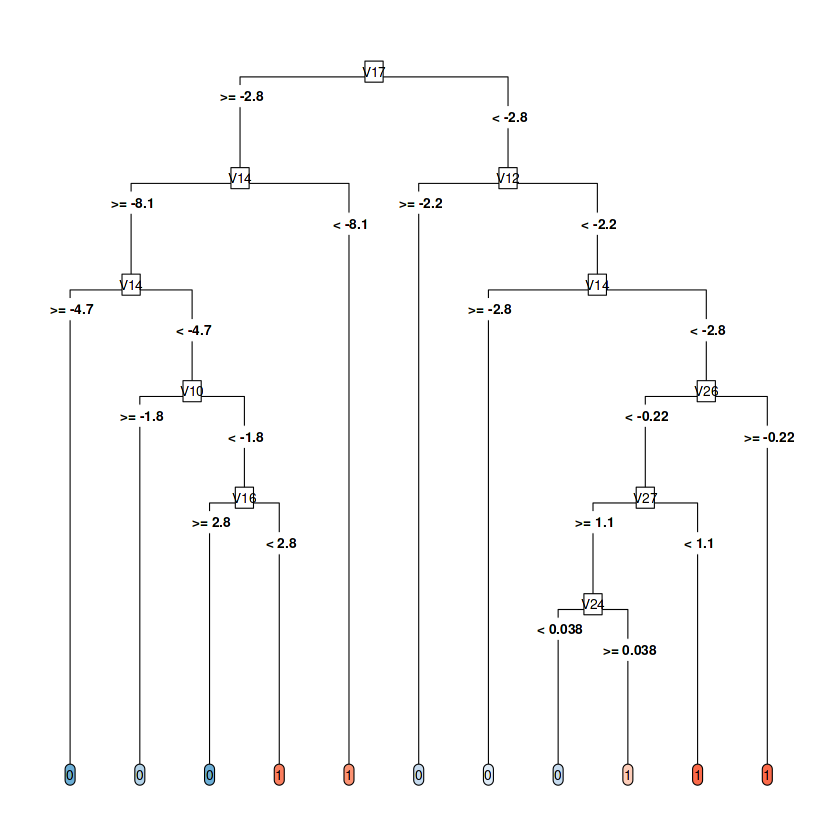

In [24]:
rpart.plot(tree,cex=0.66,extra=0,type=5,box.palette="BuRd")


Area under the curve (AUC): 0.821

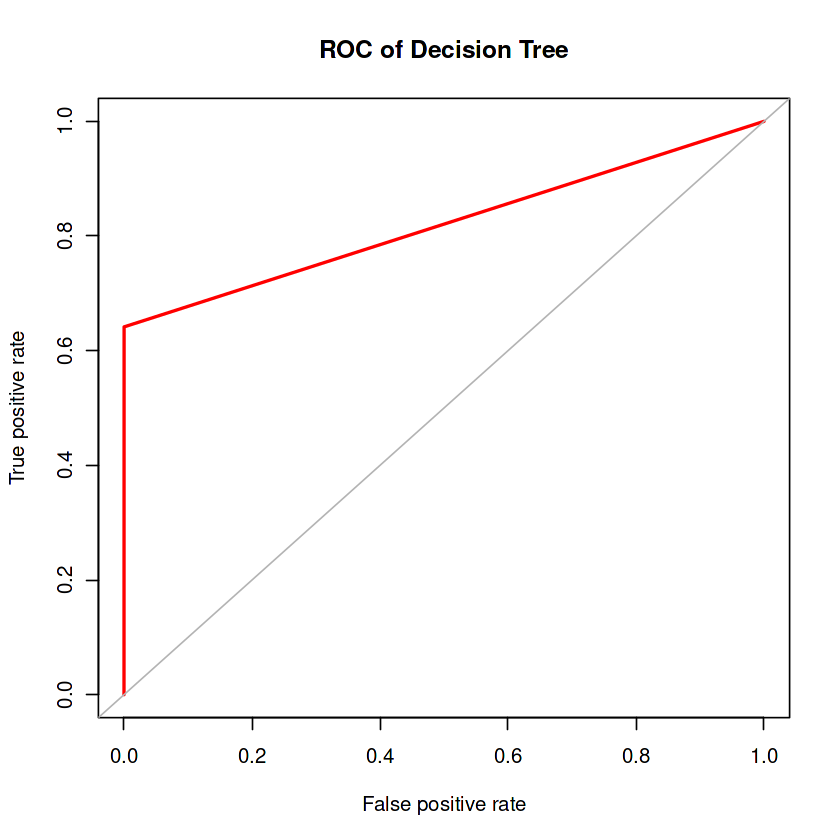

In [25]:
roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit=TRUE,
         col="red",main="ROC of Decision Tree")

### This is the ROC of Decision Tree Algorithm

The Area Under the Curve (AUC) is 0.821

# Random Forest Algorithm

In [26]:
samp=as.integer(0.49*ntr)
rf=randomForest(Class ~ .,data=credit_card.train,ntree=39,samplesize=samp,maxnodes=44)
rf_pred=predict(rf,credit_card.test)
credit_card.testc$Pred=rf_pred

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)




Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56853    21
         1     2    85
                                          
               Accuracy : 0.9996          
                 95% CI : (0.9994, 0.9997)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8806          
                                          
 Mcnemar's Test P-Value : 0.0001746       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8019          
         Pos Pred Value : 0.9996          
         Neg Pred Value : 0.9770          
             Prevalence : 0.9981          
         Detection Rate : 0.9981          
   Detection Prevalence : 0.9985          
      Balanced Accuracy : 0.9009          
                                          
       'Positive' Class : 0               
                  

## The Random Forest Algorithm gives an accuracy of 99.96%

Area under the curve (AUC): 0.901

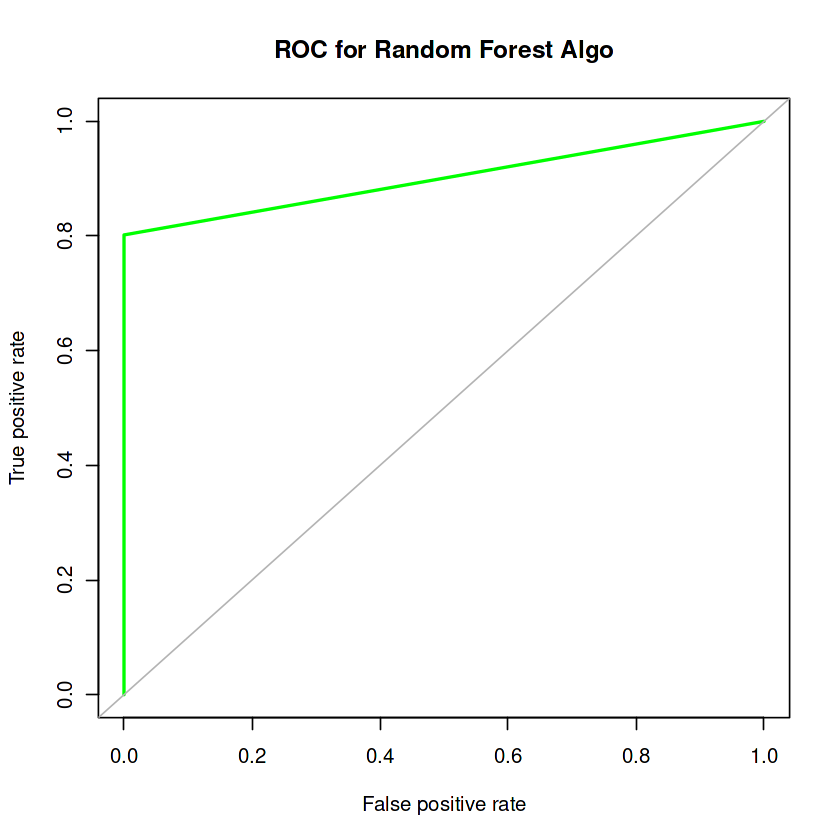

In [27]:
roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit=TRUE,
         col="green",main="ROC for Random Forest Algo")

### This is the ROC of the Random Forest Algorithm 

Area Under Curve (AUC) = 0.901

# XG Boost Algorithm 

In [28]:
labels <- credit_card.train$Class
y <- recode(labels,'0'=0,"1"=1)
xgb <- xgboost(data= data.matrix(credit_card.train[,-31]),
              label=y, eta=0.1,gamma=0.1,max_depth=10,nrounds=300,
              objective="binary:logistic",
              colsample_bytree=0.6,verbose=0,nthread=7,set.seed(42))
xgb_pred <- predict(xgb,data.matrix(credit_card.test))

credit_card.testc$Pred=0L
credit_card.testc$Pred[xgb_pred>0.5]=1L
credit_card.testc$Pred=factor(credit_card.testc$Pred)

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)



Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56854    18
         1     1    88
                                          
               Accuracy : 0.9997          
                 95% CI : (0.9995, 0.9998)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9024          
                                          
 Mcnemar's Test P-Value : 0.0002419       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8302          
         Pos Pred Value : 0.9997          
         Neg Pred Value : 0.9888          
             Prevalence : 0.9981          
         Detection Rate : 0.9981          
   Detection Prevalence : 0.9984          
      Balanced Accuracy : 0.9151          
                                          
       'Positive' Class : 0               
                  

## The accuracy of XGBoost Algorithm is 99.97%

Area under the curve (AUC): 0.915

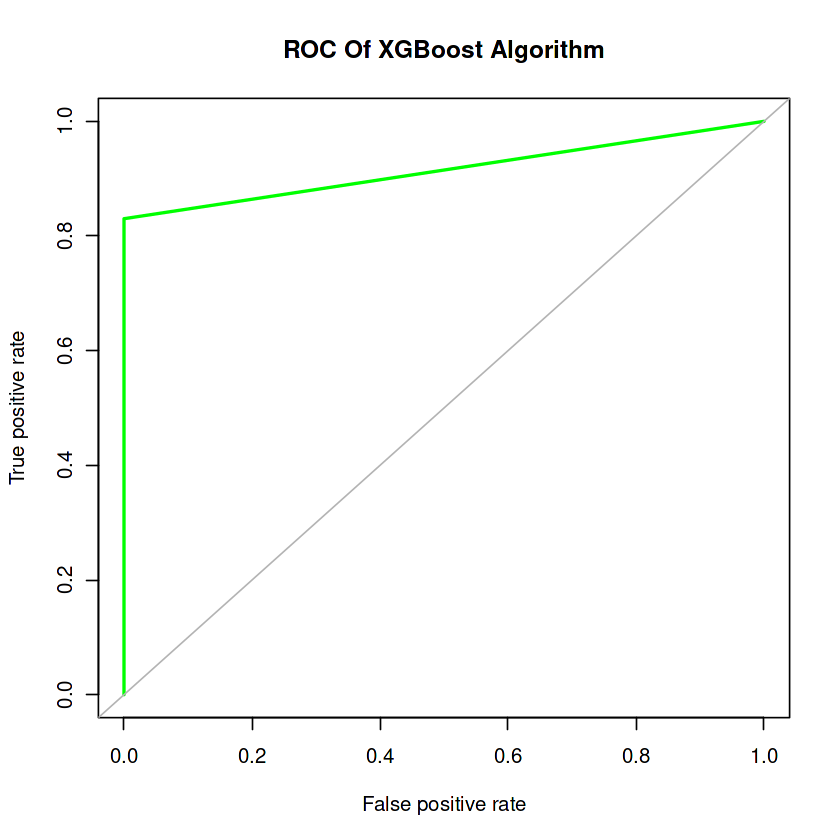

In [29]:
roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit=TRUE,
         col='green',main="ROC Of XGBoost Algorithm")

### ROC for XG Boost algorithm 
Area Under Curve(AUC) : 0.915

## From the above algorithms XG Boost Algorithm has given us the Best Accuracy (99.97%)


# Hence, XG Boost Algorithm is the best algorithm that can be used to classify the given transactions as Fraud transactions or Non-Fraud transactions.